# DESCISION TREE

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [11]:
df = pd.read_csv("SML lab 6 Decision Tree classification/Practice 1 water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df.fillna(df.mean(),inplace=True)

In [14]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [15]:
x=df.drop(columns=['Potability'])
y=df['Potability']

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [17]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
accuracy=accuracy_score(y_test,y_pred)

In [21]:
print(f"Descision Tree Accuracy :{accuracy:.2f}")

Descision Tree Accuracy :0.64


In [22]:
confu_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",confu_matrix)

Confusion Matrix :
 [[331  81]
 [152  92]]


In [23]:
print("Classification Report :\n" , classification_report (y_test,y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       412
           1       0.53      0.38      0.44       244

    accuracy                           0.64       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.63      0.64      0.63       656



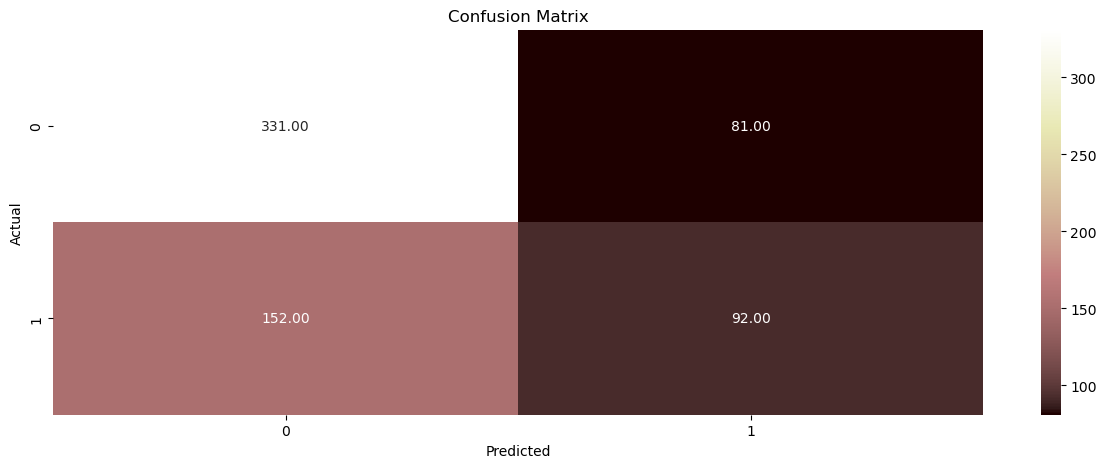

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(confu_matrix,annot=True,fmt='.2f',cmap="pink")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
#this gives us probs that each test sample belongs to class 1
y_pred_proba = classifier.predict_proba(x_test)[:,1]

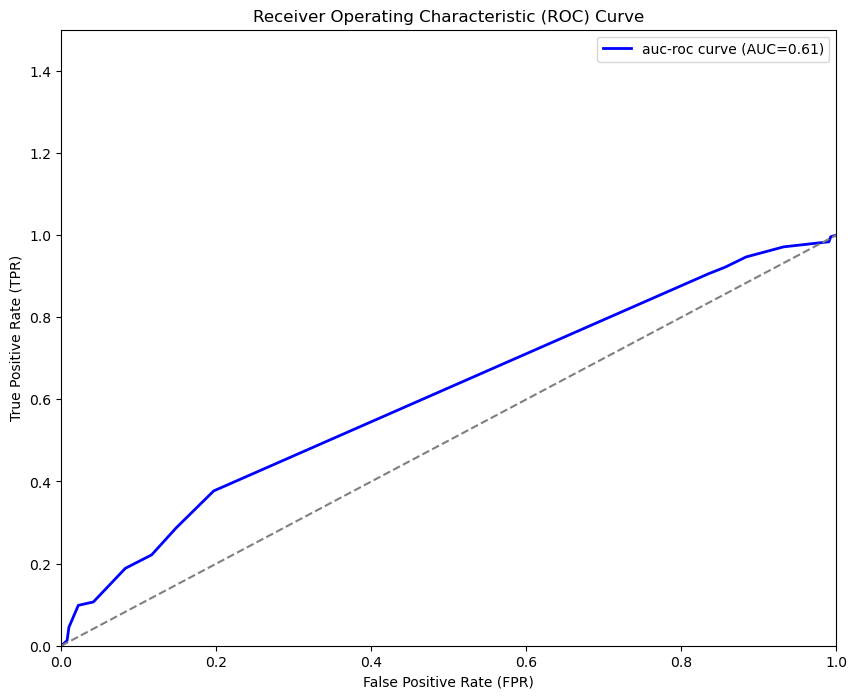

In [26]:
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.figure(figsize = (10,8))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'auc-roc curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='grey',linestyle ='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0,1])
plt.ylim([0.0,1.5])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



In [27]:
rox_auc=roc_auc_score(y_test,y_pred_proba)
print("ROC AUC score:",roc_auc)

ROC AUC score: 0.6076665207703326


# Naive Bayes 

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
#Step 1 - Load Data 
df=pd.read_csv("SML lab 7 Naive Bayes classification/iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [31]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [32]:
df.head(5)

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [33]:
df['Purchase Iphone'].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

In [34]:
x=df.drop(columns=['Purchase Iphone'])
y=df['Purchase Iphone']

In [35]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [36]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [37]:
model=GaussianNB()
model.fit(x_train_scaled,y_train)

GaussianNB()

In [38]:
y_pred=model.predict(x_test_scaled)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
accuracy=accuracy_score(y_test,y_pred)
print(f"Naive bayes:{accuracy:.2f}")

Naive bayes:0.91


In [40]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))

Confusion Matrix
 [[48  4]
 [ 3 25]]


In [41]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



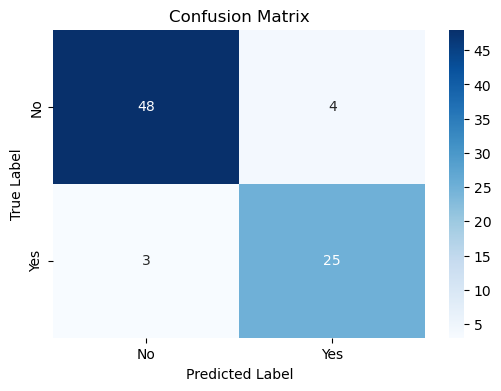

In [42]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Correct way to set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



# SUPPORT VECTOR MACHINE

In [108]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV

In [110]:
df=pd.read_csv("heart (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


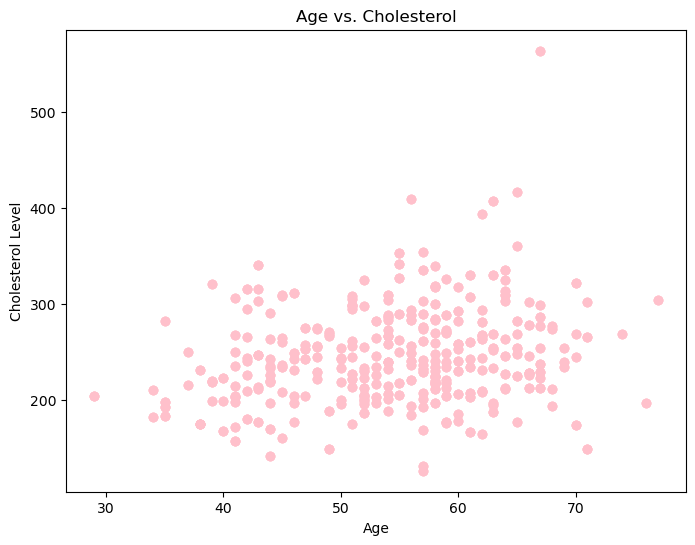

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'],df['chol'],color='pink',label='scatter plot')
# Labels and title
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Age vs. Cholesterol')

# Show plot
plt.show()

In [116]:
x=df.drop(columns=df[['target']])
y=df["target"]


In [118]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [197]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [199]:
ml=svm.SVC()

In [201]:
param_grid={
    'C': [1,10,100,1000,10000],
    'gamma' : [0.1,0.01,0.001,0.0001],
    'kernel': ['rbf']
}

In [203]:
grid=GridSearchCV(ml,param_grid,refit=True,verbose=1,cv=15)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


GridSearchCV(cv=15, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [204]:
print("Best parameters",grid.best_params_)

Best parameters {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [205]:
best_svm=grid.best_estimator_
best_svm

SVC(C=1000, gamma=0.001)

In [206]:
y_pred=best_svm.predict(x_test)

In [207]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Best Accuracy {accuracy : .2f}")

Best Accuracy  1.00


In [208]:
best_score=grid.best_score_
best_score

0.9817059483726152

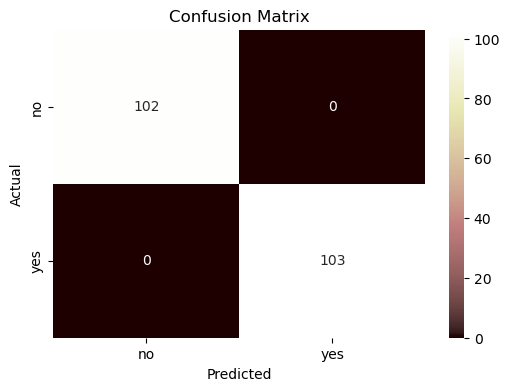

In [209]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='pink',xticklabels=['no','yes'],yticklabels=['no','yes'])
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Logistic Regression 

In [217]:

# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [219]:
# importing the dataset
df = pd.read_csv('Lab dataset diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [225]:
x=df.drop(columns = df[['Outcome']])
y=df['Outcome']

In [231]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [233]:
scaler=StandardScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.fit_transform(x_test)

In [235]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [247]:
y_pred=log_reg.predict(x_test)

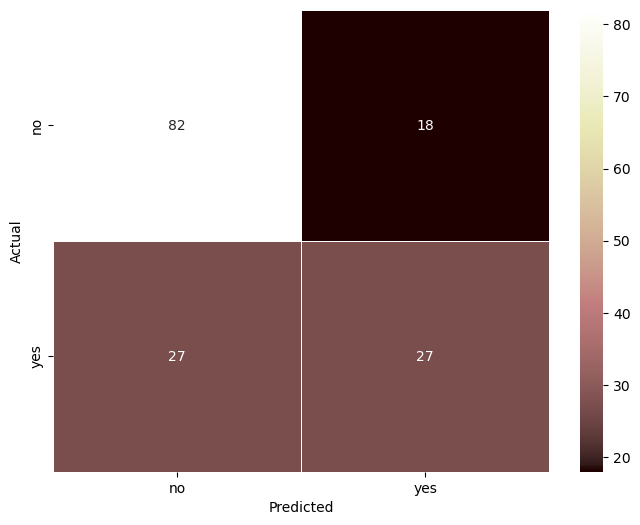

In [259]:
cm=confusion_matrix(y_test,y_pred)
cm
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='pink',xticklabels=['no','yes'],yticklabels=['no','yes'],lw=0.5)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [265]:
y_pred_proba=log_reg.predict_proba(x_test)[:,1]

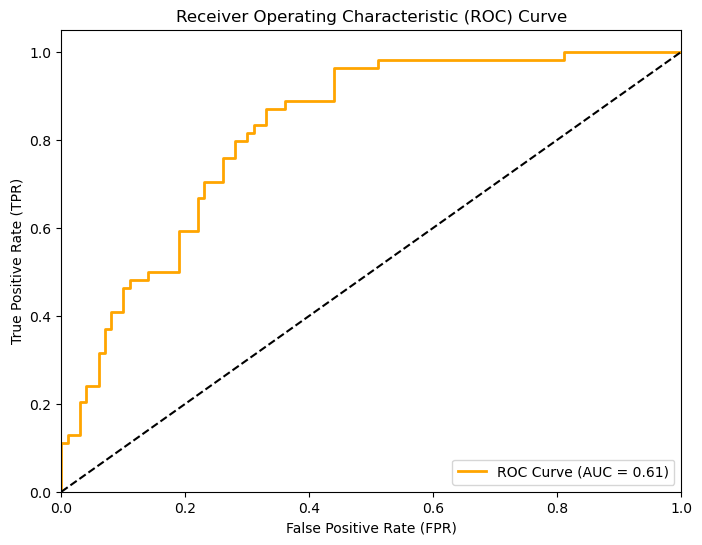

In [273]:
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
auc_roc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [275]:
# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[82 18]
 [27 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

